<a href="https://colab.research.google.com/github/rajarishiR/programm/blob/main/rishi_made_decisiontree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/wbc.csv")
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [3]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
data.shape

(569, 33)

In [5]:
# since 569 data points are missing in unnamed : 32 column we will be deleting the column
del data['Unnamed: 32']

In [6]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# since id cannot be used as a feature we will be deleting the id column
del data['id']

In [9]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# seperating feature and target value [diagnosis] will be my target and remaining will be my feature.
X = data.loc[:,data.columns[2:]]
Y = data['diagnosis']
Y = Y.map({'M':1, 'B':0}) # maping all M as 1 and B as 0

In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
# Decision tree fitting
from sklearn.tree import DecisionTreeClassifier # since its a classification problem we use classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0])

In [13]:
# evaluation metric [since its a classification we use auroc,f1-score,accuracy as my evaluation metric]
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
ac = accuracy_score(Y_test, y_pred)
auroc = roc_auc_score(Y_test,y_pred)
print(ac,"accuracy")
print(auroc,"auroc")

0.9649122807017544 accuracy
0.9672077922077923 auroc


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


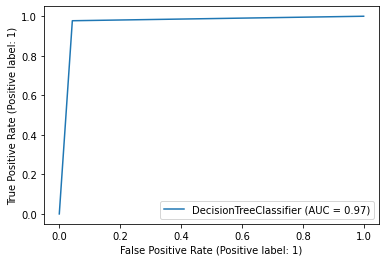

In [14]:
# showing the roc curve
plot_roc_curve(dt, X_test, Y_test)

In [16]:
# Since this model will go on it will be overfitting now to reduce the overfitting we have toreduce the complexicity, to do so we will use the max depth parameter in cross validation .
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,60]:
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X_train, Y_train)
  vali = cross_val_score(dt, X, Y, cv=10)
  print("Depth :",i,"cross validation score :",np.mean(vali)) # we use mean cause we want the average of the cross validation score
  # since the depth 5 has the highest cross validation score we use 5 as the max depth parameter

Depth : 1 cross validation score : 0.8893170426065163
Depth : 2 cross validation score : 0.9192042606516291
Depth : 3 cross validation score : 0.9121867167919799
Depth : 4 cross validation score : 0.9121867167919799
Depth : 5 cross validation score : 0.9192982456140351
Depth : 6 cross validation score : 0.9157268170426063
Depth : 7 cross validation score : 0.9157894736842105
Depth : 8 cross validation score : 0.9069235588972431
Depth : 9 cross validation score : 0.9140037593984962
Depth : 10 cross validation score : 0.9086152882205514
Depth : 20 cross validation score : 0.9121240601503761
Depth : 30 cross validation score : 0.9121867167919799
Depth : 40 cross validation score : 0.9121553884711779
Depth : 60 cross validation score : 0.9086779448621553


In [24]:
#Feature importance to find the best feature
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,Y_train)
importance = dt.feature_importances_
list(zip(importance,X_test.columns)) 

[(0.05307780070343242, 'texture_mean'),
 (0.0, 'perimeter_mean'),
 (0.0, 'area_mean'),
 (0.0, 'smoothness_mean'),
 (0.0, 'compactness_mean'),
 (0.04367277733154366, 'concavity_mean'),
 (0.0, 'concave points_mean'),
 (0.0, 'symmetry_mean'),
 (0.0, 'fractal_dimension_mean'),
 (0.0, 'radius_se'),
 (0.0, 'texture_se'),
 (0.009617911458442546, 'perimeter_se'),
 (0.013051165627534984, 'area_se'),
 (0.0, 'smoothness_se'),
 (0.0153373552618367, 'compactness_se'),
 (0.0, 'concavity_se'),
 (0.0, 'concave points_se'),
 (0.0, 'symmetry_se'),
 (0.0, 'fractal_dimension_se'),
 (0.7057014018885911, 'radius_worst'),
 (0.010923903270751734, 'texture_worst'),
 (0.0, 'perimeter_worst'),
 (0.017409970837760583, 'area_worst'),
 (0.0, 'smoothness_worst'),
 (0.0, 'compactness_worst'),
 (0.0, 'concavity_worst'),
 (0.13120771362010622, 'concave points_worst'),
 (0.0, 'symmetry_worst'),
 (0.0, 'fractal_dimension_worst')]

[Text(0.6022727272727273, 0.9166666666666666, 'X[19] <= 16.795\ngini = 0.461\nsamples = 455\nvalue = [291, 164]'),
 Text(0.38636363636363635, 0.75, 'X[26] <= 0.16\ngini = 0.16\nsamples = 308\nvalue = [281, 27]'),
 Text(0.22727272727272727, 0.5833333333333334, 'X[26] <= 0.135\ngini = 0.079\nsamples = 291\nvalue = [279, 12]'),
 Text(0.13636363636363635, 0.4166666666666667, 'X[11] <= 6.597\ngini = 0.036\nsamples = 269\nvalue = [264, 5]'),
 Text(0.09090909090909091, 0.25, 'X[12] <= 38.605\ngini = 0.029\nsamples = 268\nvalue = [264, 4]'),
 Text(0.045454545454545456, 0.08333333333333333, 'gini = 0.015\nsamples = 257\nvalue = [255, 2]'),
 Text(0.13636363636363635, 0.08333333333333333, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.18181818181818182, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3181818181818182, 0.4166666666666667, 'X[0] <= 20.785\ngini = 0.434\nsamples = 22\nvalue = [15, 7]'),
 Text(0.2727272727272727, 0.25, 'X[22] <= 811.1\ngini = 0.278\nsamples = 18\nva

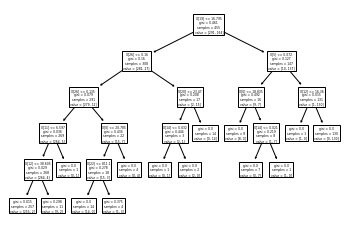

In [25]:
#plotting the decision tree
from sklearn import tree
tree.plot_tree(dt)

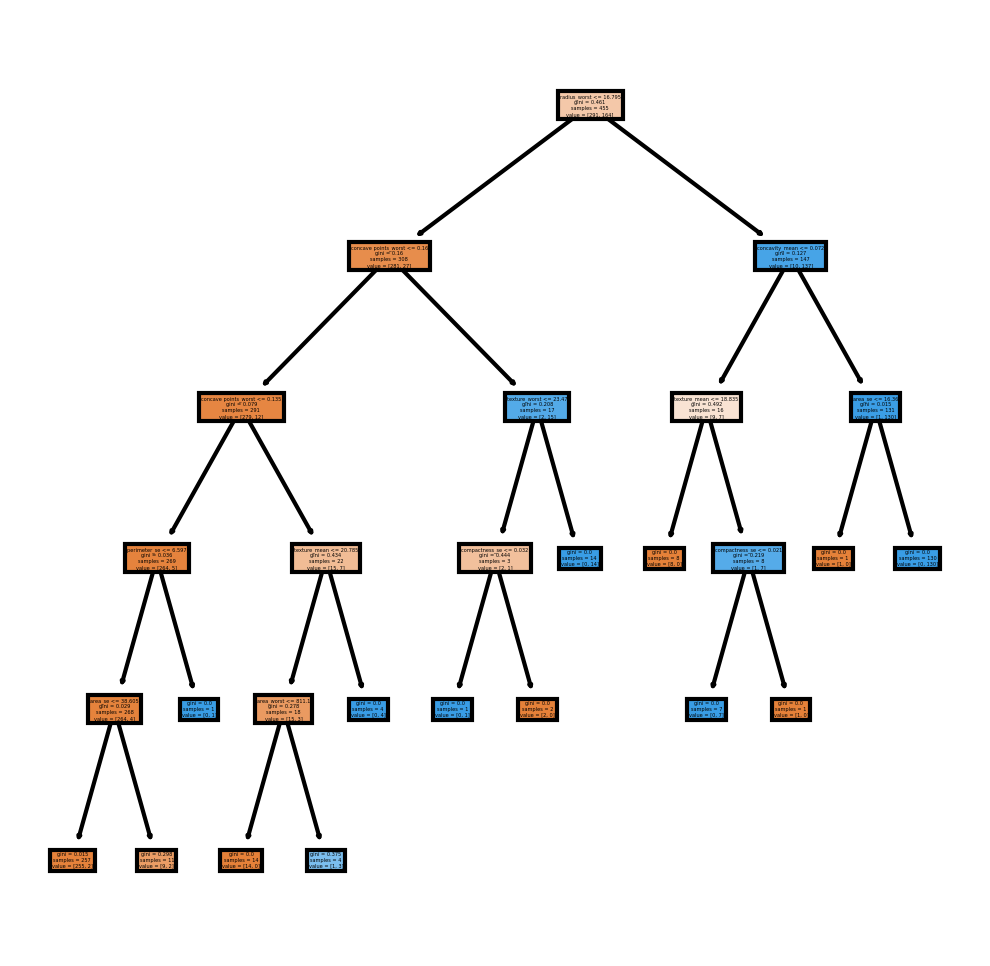

In [26]:
# better visuvalization of the tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')